# Upload the dataset from kaggle


In [1]:
'''
In order to uplaod the dataset from Kaggle, we need to upload kaggle.json file to the colab. In order to get and upload .json file, follow the below instructions:
1- Go to your Kaggle profile.
2- Click "Edit profile"
3- In API, section click "Create NEW API Token"
4- .json file will be downloaded to your local.
5- To upload .json file, use below code.
'''
from google.colab import files

kaggle_file = files.upload()


Saving kaggle.json to kaggle.json


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 90% 144M/161M [00:01<00:00, 64.3MB/s]
100% 161M/161M [00:02<00:00, 81.4MB/s]


In [ ]:
!unzip corn-or-maize-leaf-disease-dataset.zip

# Prepare the dataset

In [5]:
import os
import shutil
data_dir = "/content/data"
print(os.listdir(data_dir))

['Healthy', 'Common_Rust', 'Gray_Leaf_Spot', 'Blight']


In [6]:
train_test = ("train","test")
classes = ("Gray_Leaf_Spot","Healthy","Blight","Common_Rust")

for tt in train_test:
  path = os.path.join(data_dir,tt)
  if not os.path.exists(path):
    os.makedirs(path)
    for cls in classes:
      path_t = os.path.join(path,cls)
      if not os.path.exists(path_t):
        os.makedirs(path_t)

In [7]:
train_size = 0.7
test_size = 0.3
train_dir = "/content/data/train"
test_dir = "/content/data/test"

In [8]:
for cls in classes:
  path = os.path.join(data_dir,cls)
  images_list = os.listdir(path)
  try:
    for images in images_list[:int(len(images_list)*train_size)]:
      train_path = os.path.join(train_dir,cls)
      shutil.move(path+"/"+images,train_path+"/"+images)
    for images in images_list[int(len(images_list)*train_size):]:
      test_path = os.path.join(test_dir,cls)
      shutil.move(path+"/"+images,test_path+"/"+images)
  except:
    print("An error occured")
    pass
  

In [9]:
#After preparing the data as train and test, we do not need to this folders anymore.
!rm -rf /content/data/Blight
!rm -rf /content/data/Gray_Leaf_Spot
!rm -rf /content/data/Healthy
!rm -rf /content/data/Common_Rust

#Uncomment to download prepared dataset
'''
from google.colab import files 

!zip -r dataset.zip /content/data

files.download('dataset.zip')
'''

"\nfrom google.colab import files \n\n!zip -r dataset.zip /content/data\n\nfiles.download('dataset.zip')\n"

# Visualization

In [10]:
#Before we dive into visualization, check how many images for each class in train and test folder.
for tt in os.listdir(data_dir):
  for cls in classes:
    path = data_dir+"/"+tt+"/"+cls
    print(f"There are {len(os.listdir(path))} {cls} images in {tt} folder") 
  print("------------------------------------------------------------------")

There are 173 Gray_Leaf_Spot images in test folder
There are 349 Healthy images in test folder
There are 344 Blight images in test folder
There are 392 Common_Rust images in test folder
------------------------------------------------------------------
There are 401 Gray_Leaf_Spot images in train folder
There are 813 Healthy images in train folder
There are 802 Blight images in train folder
There are 914 Common_Rust images in train folder
------------------------------------------------------------------


In [11]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch
import torchvision
from torch.utils.data import random_split
from torchvision.transforms import Resize
from torchvision.transforms import Compose
from torchvision.transforms import *
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [12]:
transform_dict = transforms.Compose([                                   
                                     transforms.Resize((256,256)),                                           
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])
                                                       ]
)

In [13]:
train_dir = "/content/data/train"
dataset = ImageFolder(train_dir,transform=transform_dict)

In [14]:
img, label = dataset[0]
print(img.shape,label)
img

torch.Size([3, 256, 256]) 0


tensor([[[ 0.1083,  0.2796,  0.3652,  ..., -1.0904, -1.0904, -1.1075],
         [ 0.1597,  0.3309,  0.4166,  ..., -1.1247, -1.1075, -1.0904],
         [ 0.1768,  0.2967,  0.4166,  ..., -1.1247, -1.1589, -1.1589],
         ...,
         [ 0.4166,  0.4851,  0.5193,  ...,  1.8037,  1.7865,  1.6838],
         [ 0.5022,  0.5193,  0.5536,  ...,  1.8037,  1.7865,  1.6838],
         [ 0.5364,  0.5536,  0.5707,  ...,  1.8037,  1.7865,  1.6667]],

        [[ 0.3978,  0.5728,  0.6429,  ..., -0.9853, -0.9678, -0.9853],
         [ 0.4328,  0.6078,  0.6954,  ..., -1.0028, -0.9853, -0.9678],
         [ 0.4503,  0.5903,  0.6954,  ..., -1.0203, -1.0553, -1.0553],
         ...,
         [-0.0749, -0.0224,  0.0301,  ...,  1.3782,  1.3782,  1.2731],
         [-0.0049,  0.0126,  0.0476,  ...,  1.3782,  1.3606,  1.2731],
         [ 0.0301,  0.0476,  0.0651,  ...,  1.3782,  1.3606,  1.2381]],

        [[ 0.9145,  1.0888,  1.1759,  ..., -0.7761, -0.7413, -0.7587],
         [ 0.9668,  1.1237,  1.2282,  ..., -0

In [15]:
''''
 The list of classes is stored in the .classes property of the dataset. The numeric label for each element corresponds
 to index of element's label in the list of classes.
'''
print(dataset.classes)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [16]:
# We can view the image using matplotlib, however we need to to change the tensor dimensions to (100,585,3).
import matplotlib.pyplot as plt

def show_example(img,label):
  print("Label", dataset.classes[label], "-" + str(label))
  plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Blight -0


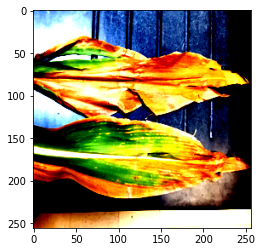

In [17]:
show_example(*dataset[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Common_Rust -1


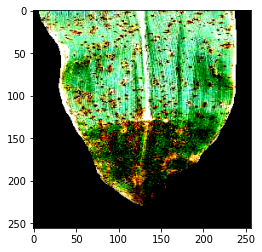

In [19]:
show_example(*dataset[1200])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Gray_Leaf_Spot -2


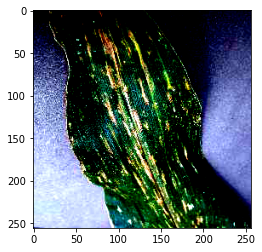

In [20]:
show_example(*dataset[1800])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label Healthy -3


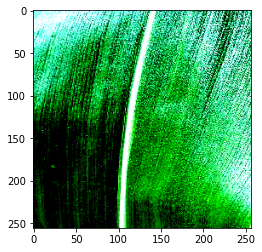

In [21]:
show_example(*dataset[2234])

# Training and Validation Dataset

In [22]:
random_seed = 42
torch.manual_seed(random_seed)

In [23]:
# Since we do not have validation set for this task, we'll use some parts of train set as a validation set.
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset,[train_size,val_size])
len(train_ds), len(val_ds)

(2430, 500)

In [24]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [25]:
train_dl = DataLoader(train_ds, 
                      batch_size= batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)
val_dl = DataLoader(val_ds,
                    batch_size=batch_size*2,
                    num_workers=4,
                    pin_memory=True)

In [26]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# We can look at batches of images from the dataset using the **make_grid** method from torchvision.

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


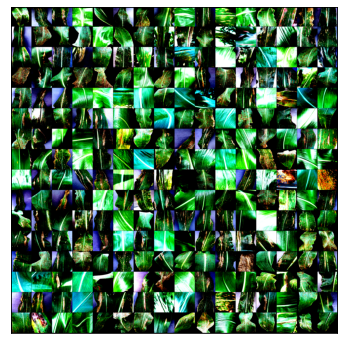

In [27]:
show_batch(val_dl)

# Defining the Model (VGG16)

In [28]:
model = models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
from collections import OrderedDict
# Freeze pretrained model parameters to avoid backpropogating through them
for parameter in model.parameters():
    parameter.requires_grad = False

# Build custom classifier
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(25088, 5000)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(5000, 102)),
                                        ('output', nn.LogSoftmax(dim=1))]))

model.classifier = classifier

In [30]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    val_loss = 0
    accuracy = 0
    for images, labels in iter(validateloader):
        images, labels = images.to('cuda'), labels.to('cuda')
        output = model.forward(images)
        val_loss += criterion(output, labels).item()
        probabilities = torch.exp(output)       
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [31]:
# Loss function and gradient descent
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# Training

In [32]:
# Train the classifier
def train_classifier():
    epochs = 15
    steps = 0
    print_every = 40

    model.to('cuda')

    for e in range(epochs):   
        model.train()
        running_loss = 0
        for images, labels in iter(train_dl):  
            steps += 1
            images, labels = images.to('cuda'), labels.to('cuda')
    
            optimizer.zero_grad()
    
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
            if steps % print_every == 0:
            
                model.eval()
            
                # Turn off gradients for validation, saves memory and computations
                with torch.no_grad():
                    validation_loss, accuracy = validation(model, val_dl, criterion)
        
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Validation Loss: {:.3f}.. ".format(validation_loss/len(val_dl)),
                      "Validation Accuracy: {:.3f}".format(accuracy/len(val_dl)))
        
                running_loss = 0
                model.train()
                
train_classifier()

Epoch: 3/15..  Training Loss: 0.005..  Validation Loss: 0.815..  Validation Accuracy: 0.898
Epoch: 5/15..  Training Loss: 0.008..  Validation Loss: 0.608..  Validation Accuracy: 0.920
Epoch: 7/15..  Training Loss: 0.002..  Validation Loss: 0.969..  Validation Accuracy: 0.906
Epoch: 9/15..  Training Loss: 0.005..  Validation Loss: 0.914..  Validation Accuracy: 0.918
Epoch: 11/15..  Training Loss: 0.001..  Validation Loss: 0.825..  Validation Accuracy: 0.912
Epoch: 13/15..  Training Loss: 0.002..  Validation Loss: 0.752..  Validation Accuracy: 0.916
Epoch: 15/15..  Training Loss: 0.001..  Validation Loss: 0.902..  Validation Accuracy: 0.918


# Testing

In [33]:
testing_transforms = transforms.Compose([transforms.Resize((256,256)),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])


In [34]:
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)

In [35]:
def test_accuracy(model, test_loader):
    # Do validation on the test set
    model.eval()
    model.to('cuda')
    with torch.no_grad():  
        accuracy = 0  
        for images, labels in iter(test_loader): 
            images, labels = images.to('cuda'), labels.to('cuda') 
            
            output = model.forward(images)
            probabilities = torch.exp(output)        
            equality = (labels.data == probabilities.max(dim=1)[1])      
            accuracy += equality.type(torch.FloatTensor).mean()      
        print("Test Accuracy: {}".format(accuracy/len(test_loader)))    
        
        
test_accuracy(model, test_loader)

Test Accuracy: 0.9281250238418579
